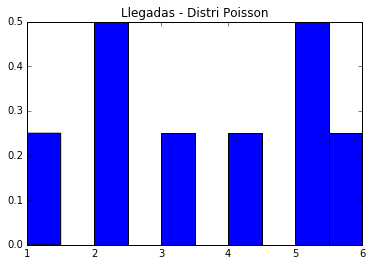

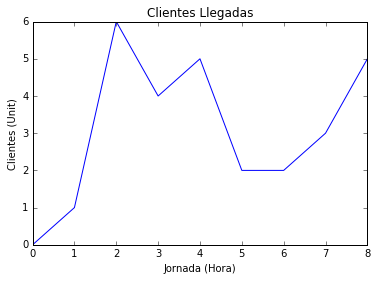

Clientes Promedio en Llegar:  4.0


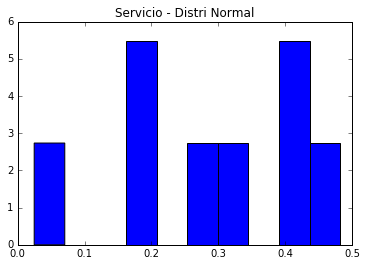

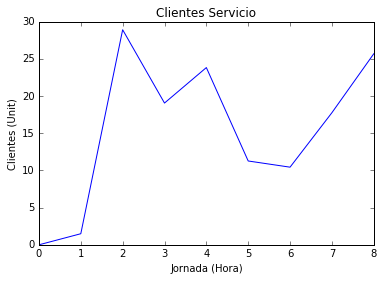

Tiempo Promedio de Servicio:  15.0

INFORMACION INICIAL
Iteracion	Llegadas	Servicio(min)
[ 0 ]		1 		1
[ 1 ]		6 		28
[ 2 ]		4 		19
[ 3 ]		5 		23
[ 4 ]		2 		11
[ 5 ]		2 		10
[ 6 ]		3 		17
[ 7 ]		5 		25

INFORMACION SIMULADA
Iteracion	Llegadas	Servicio	Cola		Sistema		Salidas
[ 0 ]		1 		41 		0 		1 		0
[ 1 ]		6 		3 		0 		6 		1
[ 2 ]		4 		2 		3 		7 		3
[ 3 ]		5 		3 		5 		10 		4
[ 4 ]		2 		4 		7 		9 		6
[ 5 ]		2 		6 		5 		7 		10
[ 6 ]		3 		4 		1 		4 		16
[ 7 ]		5 		3 		0 		5 		20

INFORMACION DEL SISTEMA
Clientes promedio en Llegar:  3
Tiempo entre Llegadas:  20.0
Clientes promedio en ser Atendidos:  8
Tiempo de Servicio:  7.27
Clientes promedio en la Cola:  3
Tiempo en la Cola:  74.55
Clientes promedio en el Sistema:  6
Tiempo en la Sistema:  81.82


In [97]:
import matplotlib.pyplot as plt
import numpy as np
import GenNumPseudoAleat as rnd
import math
%matplotlib inline

#Genera las variables aleatorias para las distribuciones discretas
def genValAleat(N,Px):
    PxAcum = Px
    PxAcum[0] = Px[0]
    for i in range(len(Px)-1):
        PxAcum[i+1] = PxAcum[i] + Px[i+1]   
    PxAcum = [0] + PxAcum
    Valeat = []
    genAleat = rnd.WichmannHill(N)
    for i in range(len(genAleat)):
        for j in range(len(PxAcum)-1):
            if(genAleat[i] > PxAcum[j] and genAleat[i] <= PxAcum[j+1]):
                Valeat += [j]
                break
    return Valeat

#Distribucion de Poisson (Discreta) 
#ly(lambda) = número de veces que se espera que ocurra el fenómeno durante un intervalo dado
#k = número de ocurrencias del evento 
def poisson(ly):
    k = 3 * ly
    Px = [1.0] * k
    for kx in range(k):
        Px[kx] = (math.exp(-ly) * (ly ** kx))/float(math.factorial(kx))
    return Px

#Distribucion Normal (Continua) 
def c(k):
    ck = 1.0
    if(k >= 1):
        ck = 0.0
        for m in range(k):
            ck += (c(m)*c(k-1-m))/float((m+1)*((2*m)+1))
    return ck

def erfInv(z):
    erf = 0
    infinito = 5
    for k in range(infinito):
        erf += (c(k)/float((2*k)+1))*((math.sqrt(math.pi)*z/float(2))**((2*k)+1))
    return erf

#miu = Media (Valor Esperado)
#sigma = Varianza 
def normal(miu,sigma,N):
    teta = math.sqrt(sigma) 
    Px = [1.0] * N
    p = rnd.WichmannHill(N)
    for i in range(len(Px)):
        Px[i] = miu + (teta*math.sqrt(2)*erfInv((2*p[i])-1))
    return Px

#Establece la escala del tiempo
def EscalaTime(time,N):
    EscalaTiempo= [1.0] * (N+1)
    for i in range(N+1):
        EscalaTiempo[i] = time*i/float(60)
    return EscalaTiempo

#Simula la tasa de llegadas con distribucion poisson
def SimulLlegadas(ly,EscalaTiempo):
    N = len(EscalaTiempo)-1
    Px = poisson(ly)
    Llegadas = genValAleat(N,Px)
    plt.hist(Llegadas,normed=True)
    plt.title("Llegadas - Distri Poisson")
    plt.show()
    Llegadas.insert(0,0)
    plt.plot(EscalaTiempo,Llegadas)
    plt.title("Clientes Llegadas")
    plt.xlabel("Jornada (Hora)")
    plt.ylabel("Clientes (Unit)")
    plt.show()
    PromLlegadas = 0
    for i in range(len(Llegadas)):
        PromLlegadas = PromLlegadas + Llegadas[i]
    Llegadas.remove(Llegadas[0])
    print "Clientes Promedio en Llegar: ",round(PromLlegadas/float(len(Llegadas)))
    return Llegadas

#Simula el tiempo de servicio con distribucion normal (varianza del 10%)
def SimulServicio(miu,EscalaTiempo):
    N = len(EscalaTiempo)-1
    varianza = (1/float(miu))*(0.1)
    Servicio = normal(1/float(miu),varianza,N)
    plt.hist(Servicio,normed=True)
    plt.title("Servicio - Distri Normal")
    plt.show()
    for i in range(len(Servicio)):
        if(Servicio[i] <= 0):
            Servicio[i] =  0.0001
        else:
            Servicio[i] =  round(Servicio[i]*EscalaTiempo[1]*60,4)
    Servicio.insert(0,0)
    plt.plot(EscalaTiempo,Servicio)
    plt.title("Clientes Servicio")
    plt.xlabel("Jornada (Hora)")
    plt.ylabel("Clientes (Unit)")
    plt.show()
    PromServicio = 0
    for i in range(len(Servicio)):
        PromServicio = PromServicio + Servicio[i]
    print "Tiempo Promedio de Servicio: ",round(PromServicio/float(len(Servicio)))
    Servicio.remove(Servicio[0])
    return Servicio

#Muestra las tablas con la informacion inicial
def infoInicial(Llegadas,Servicio):
    print "\nINFORMACION INICIAL"
    print "Iteracion\tLlegadas\tServicio(min)"
    for i in range(len(Llegadas)):
        print "[",i,"]\t\t",int(Llegadas[i]),"\t\t",int(Servicio[i])
        
#Muestra las tablas con la informacion de cada iteracion de la simulacion
def infoSimulacion(Simulacion):
    Llegadas = Simulacion[0]
    Servicio = Simulacion[1]
    Cola = Simulacion[2]
    Sistema = Simulacion[3]
    Salidas = Simulacion[4]
    print "\nINFORMACION SIMULADA"
    print "Iteracion\tLlegadas\tServicio\tCola\t\tSistema\t\tSalidas"
    for i in range(len(Llegadas)):
        print "[",i,"]\t\t",int(Llegadas[i]),"\t\t",int(Servicio[i]),"\t\t",int(Cola[i]),"\t\t",int(Sistema[i]),"\t\t",int(Salidas[i])

#Simula el comportamiento del sistema al inicio de cada iteracion
def RunSimulation(Llegadas,Servicio,time,N):
    Cola = [0.0] * N
    Sistema = [0.0] * N
    Salidas = [0.0] * N
    TdispS = [time] * N
    NServ = [0.0] * N
    for i in range(N):
        if(i==0):
            Sistema[i] = Llegadas[i]
            NServ[i] = math.ceil(TdispS[i]/float(Servicio[i]))
        else:
            if(TdispS[i-1]/float(Servicio[i-1]) < Llegadas[i-1]):
                TdispS[i] = TdispS[i-1] - (NServ[i-1]*Servicio[i-1]) + time
            NServ[i] = math.ceil(TdispS[i]/float(Servicio[i]))
            if(time/float(Servicio[i-1]) < Llegadas[i-1] + Cola[i-1]):
                Cola[i] = Llegadas[i-1] + Cola[i-1] - NServ[i-1]
            Sistema[i] = Cola[i] + Llegadas[i]
            if(time/float(Servicio[i-1]) > Llegadas[i-1]+Cola[i-1]):
                Salidas[i] = Salidas[i-1] + Llegadas[i-1] + Cola[i-1]
            else:
                if(TdispS[i]==time):
                    Salidas[i] = Salidas[i-1] + NServ[i-1]
                else:
                    Salidas[i] = Salidas[i-1] + NServ[i-1] - 1
        #print "[",i,"] Lleg: ",int(Llegadas[i])," Serv: ",int(NServ[i])," TDispS: ",int(TdispS[i])," Cola: ",int(Cola[i])," Sis: ",int(Sistema[i])," Sali: ",int(Salidas[i])
    Simulacion = [Llegadas,NServ,Cola,Sistema,Salidas]
    return Simulacion

#Calcula promedios de la simulacion
def infoSistem(Simulacion,time):
    Llegadas = Simulacion[0]
    Servicio = Simulacion[1]
    Cola = Simulacion[2]
    Sistema = Simulacion[3]
    promLleg = 0
    promServ = 0
    promCola = 0
    promSistem = 0 
    for i in range(len(Llegadas)):
        promLleg = promLleg + Llegadas[i]
        promServ = promServ + Servicio[i]
        promCola = promCola + Cola[i]
        promSistem = promSistem + Sistema[i]
    timeCola = CalcTiempCola(Llegadas,Servicio,time)
    timeSistem = CalcTiempSistema(timeCola,Servicio,time)
    promTimeCola = 0
    promTimeSistem = 0
    for i in range(len(timeCola)):
        promTimeCola = promTimeCola + timeCola[i]
        promTimeSistem = promTimeSistem + timeSistem[i]
    print "\nINFORMACION DEL SISTEMA"
    print "Clientes promedio en Llegar: ",int(round(promLleg/len(Llegadas)))
    print "Tiempo entre Llegadas: ",round(time/(promLleg/len(Llegadas)),2)
    print "Clientes promedio en ser Atendidos: ",int(round(promServ/len(Servicio)))
    print "Tiempo de Servicio: ",round(time/(promServ/len(Servicio)),2)
    print "Clientes promedio en la Cola: ",int(round(promCola/len(Cola)))
    print "Tiempo en la Cola: ",round(promTimeCola/len(timeCola),2)
    print "Clientes promedio en el Sistema: ",int(round(promSistem/len(Sistema)))
    print "Tiempo en la Sistema: ",round(promTimeSistem/len(timeSistem),2)

#Calcula el tiempo de cada cliente en la cola
def CalcTiempCola(Llegadas,Servicio,time):
    atendidos = 0
    for i in range(len(Servicio)):
        atendidos = int(atendidos + Servicio[i])
    TServ = [1.0] * atendidos
    TLleg = [1.0] * atendidos
    cont1 = 0
    cont2 = 0
    for i in range(len(Servicio)):
        if(cont1<atendidos):
            for j in range(int(Servicio[i])):
                TServ[cont1+j] = i
            cont1 = cont1+int(Servicio[i])
        if(cont2<atendidos):
            for j in range(int(Llegadas[i])):
                TLleg[cont2+j] = i
            cont2 = cont2+int(Llegadas[i])
    TimeCola = [0.0] * atendidos
    for i in range(atendidos):
        if(TServ[i]-TLleg[i] > 0):
            TimeCola[i] = (TServ[i] - TLleg[i])*time
    return TimeCola
    
#Calcula el tiempo de cada cliente en el sistema
def CalcTiempSistema(TimeCola,Servicio,time):
    TServ = [1.0] * len(TimeCola)
    cont = 0
    for i in range(len(Servicio)):
        if(cont<len(TimeCola)):
            for j in range(int(Servicio[i])):
                TServ[cont+j] = time/float(Servicio[i])
            cont = cont+int(Servicio[i])
    TimeSistem = [1.0] * int(len(TimeCola))
    for i in range(len(TimeSistem)):
        TimeSistem[i] = TimeCola[i] + TServ[i]
    return TimeSistem
        
def main():  
    ly = 4 #Tasa Llegada (Clientes x Intervalo de Tiempo)
    miu = 3 #Tasa Servicio (Clientes x Intervalo de Tiempo)
    time = 60 #Intervalo de Tiempo (Minutos)
    N = 8 #Iteraciones (Repeticiones x Intervalo de Tiempo)

    EscalaTiempo = EscalaTime(time,N)   
    Llegadas = SimulLlegadas(ly,EscalaTiempo)
    Servicio = SimulServicio(miu,EscalaTiempo)
    infoInicial(Llegadas,Servicio)
    
    Simulacion = RunSimulation(Llegadas,Servicio,time,N)
    infoSimulacion(Simulacion)
    
    infoSistem(Simulacion,time)

if __name__ == "__main__":
    main()